In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [32]:
# Data Extraction

In [33]:
vacancies = pd.read_csv("../vacancies.csv")
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             237 non-null    object
 1   salary            85 non-null     object
 2   company           237 non-null    object
 3   english_level     237 non-null    object
 4   experience_years  237 non-null    int64 
 5   domain            148 non-null    object
 6   job_type          237 non-null    object
 7   company_type      237 non-null    object
 8   country           237 non-null    object
 9   test_task_exists  237 non-null    bool  
 10  publication_date  237 non-null    object
 11  views_count       237 non-null    int64 
 12  applicant_count   237 non-null    int64 
 13  technologies      234 non-null    object
dtypes: bool(1), int64(3), object(10)
memory usage: 24.4+ KB


In [34]:
# Data Cleaning

In [35]:
vacancies["publication_date"] = pd.to_datetime(vacancies["publication_date"])
vacancies[["min_salary", "max_salary"]] = vacancies["salary"].str.extract(r"(\d+), (\d+)")
vacancies[["min_salary", "max_salary"]] = vacancies[["min_salary", "max_salary"]].astype("float")
vacancies["avg_salary"] = vacancies[["min_salary", "max_salary"]].mean(axis=1)
vacancies

,title,salary,company,english_level,experience_years,domain,job_type,company_type,country,test_task_exists,publication_date,views_count,applicant_count,technologies,min_salary,max_salary,avg_salary
0,Strong junior or Middle software engineer (par...,NaN,Artellence,Intermediate,2,Machine Learning / Big Data,Тільки віддалено,Product,Україна (Київ),False,2024-02-02,7,1,"Docker,Go,JavaScript,Linux,MongoDB,NoSQL,Pytho...",NaN,NaN,NaN
1,Senior AI Developer (Python/React) for Social ...,NaN,Fluvius,Upper-Intermediate,3,NaN,Тільки віддалено,Outstaff,Україна (Харків),False,2024-02-01,91,12,"Algorithms,Git,Go,JS,JavaScript,Machine learni...",NaN,NaN,NaN
2,Back-end developer,"[3000, 4500]",Northlanddata,Pre-Intermediate,3,Blockchain / Crypto,Тільки віддалено,Product,"Польща,Україна",False,2024-02-01,163,28,"Algorithms,Django,Docker,Git,Go,Golang,JavaScr...",3000.0,4500.0,3750.0
3,Senior Python Developer,NaN,Brander,Не вказано,3,Mobile,Тільки віддалено,Outsource,Україна,False,2024-02-02,42,13,"AWS,CI/CD,Celery,Django,Docker,FastAPI,Git,Go,...",NaN,NaN,NaN
4,Senior Python Developer,"[3000, 4000]",Radency,Upper-Intermediate,5,SaaS,Тільки віддалено,Outstaff,Україна,False,2024-02-01,45,4,"Airflow,Docker,Elasticsearch,Git,GitLab,GraphQ...",3000.0,4000.0,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Senior Python Developer,NaN,Luxoft,Upper-Intermediate,3,NaN,Office або Remote,Outsource,"Україна (Дніпро, Київ, Одеса)",False,2023-12-21,55,6,"AWS,Agile,CI/CD,CloudFormation,DynamoDB,Git,Gr...",NaN,NaN,NaN
233,AI Python Developer,NaN,Join.To.IT,Upper-Intermediate,2,NaN,Гібридна робота,Outsource,Україна (Київ),False,2024-01-03,100,10,"Docker,Kubernetes,NoSQL,Python,SQl,TensorFlow",NaN,NaN,NaN
234,Tech/Team Lead (Python),NaN,Quantum,Upper-Intermediate,5,Fintech,Office або Remote,Outsource,"Релокейт,Україна",False,2024-01-03,67,10,"AWS,Docker,Machine learning,Microservices,NoSQ...",NaN,NaN,NaN
235,python developer for algorithmic trading project,NaN,NATS,Intermediate,3,Fintech,Тільки віддалено,Product,Україна,False,2024-01-03,175,52,NaN,NaN,NaN,NaN


In [36]:
# Data Wrangling

# Preparation for Technologies Analysis

In [37]:
def get_top_technologies_by_experience_range(
    df: pd.DataFrame, 
    title: str,
    start: int,
    end: int,
) -> None:
    mask = (df["experience_years"] >= start) & (df["experience_years"] <= end)
    df = df[mask]

    plt.figure(figsize=(16, 6))
    df["technologies"].str.split(",").explode().value_counts().head(20).plot(kind="bar", color="purple", alpha=0.5)
    plt.title(title)
    plt.xlabel("Technology")
    plt.ylabel("Times")
    plt.show()

In [38]:
# Analysis of Top 20 Most Demanded Technologies

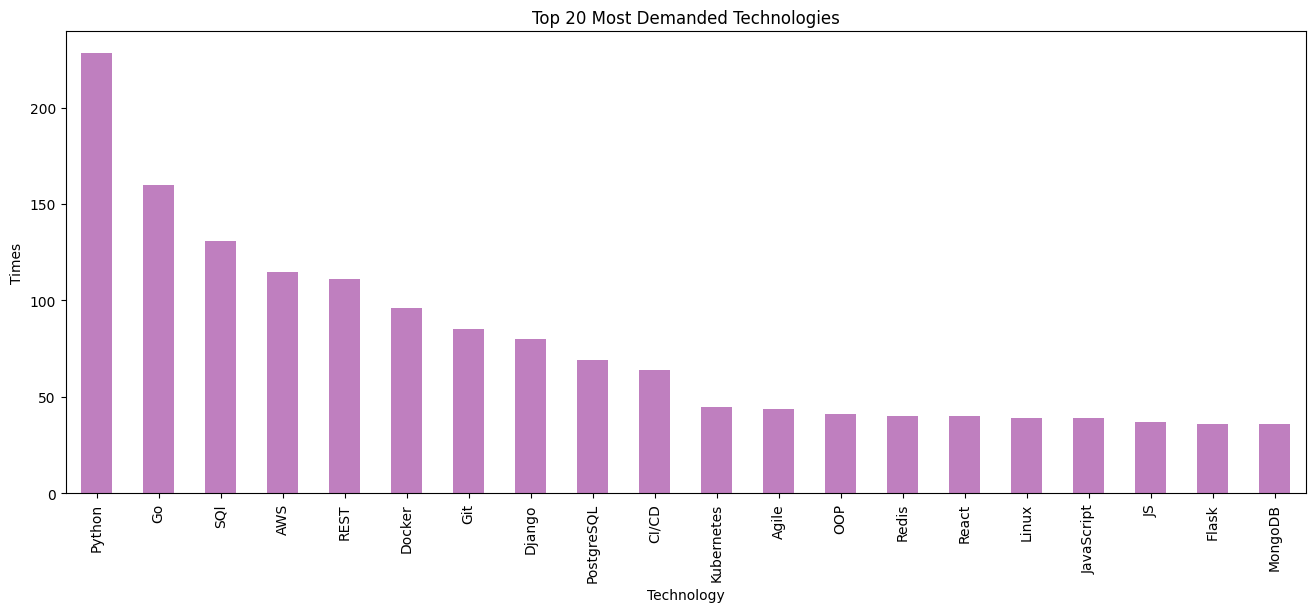

In [39]:
get_top_technologies_by_experience_range(vacancies, "Top 20 Most Demanded Technologies", 0, 5)

In [40]:
# Analysis of Top 20 Most Demanded Technologies for Junior Positions

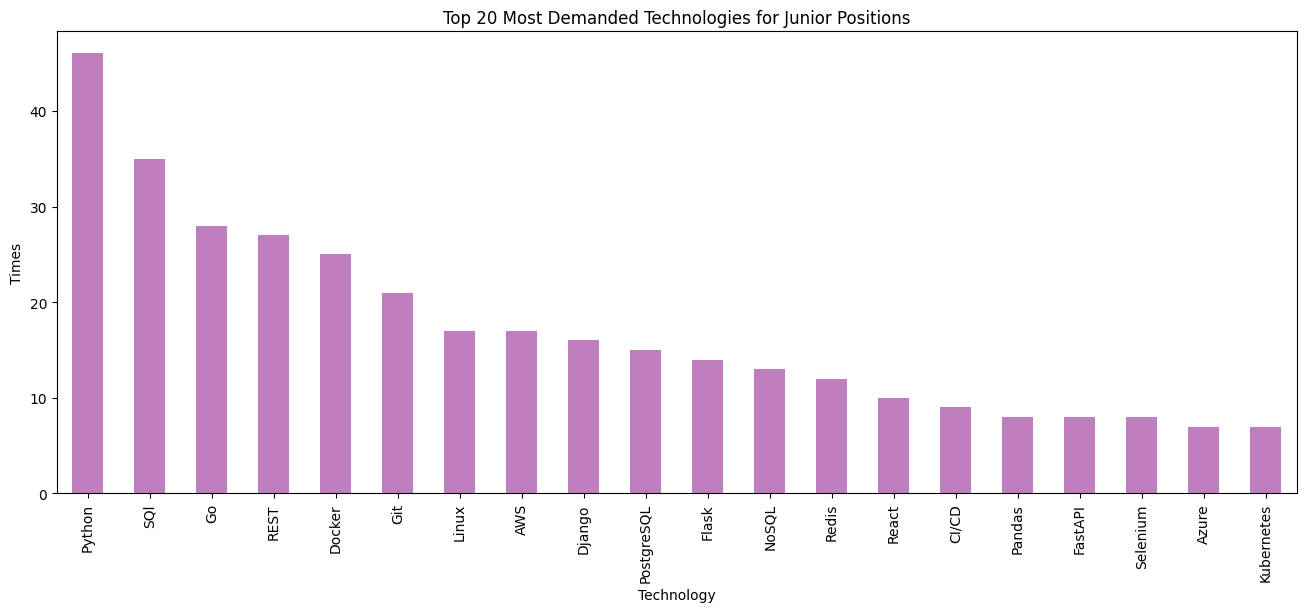

In [41]:
get_top_technologies_by_experience_range(vacancies, "Top 20 Most Demanded Technologies for Junior Positions", 1, 2)

In [42]:
# Analysis of Top 20 Most Demanded Technologies for Middle Positions

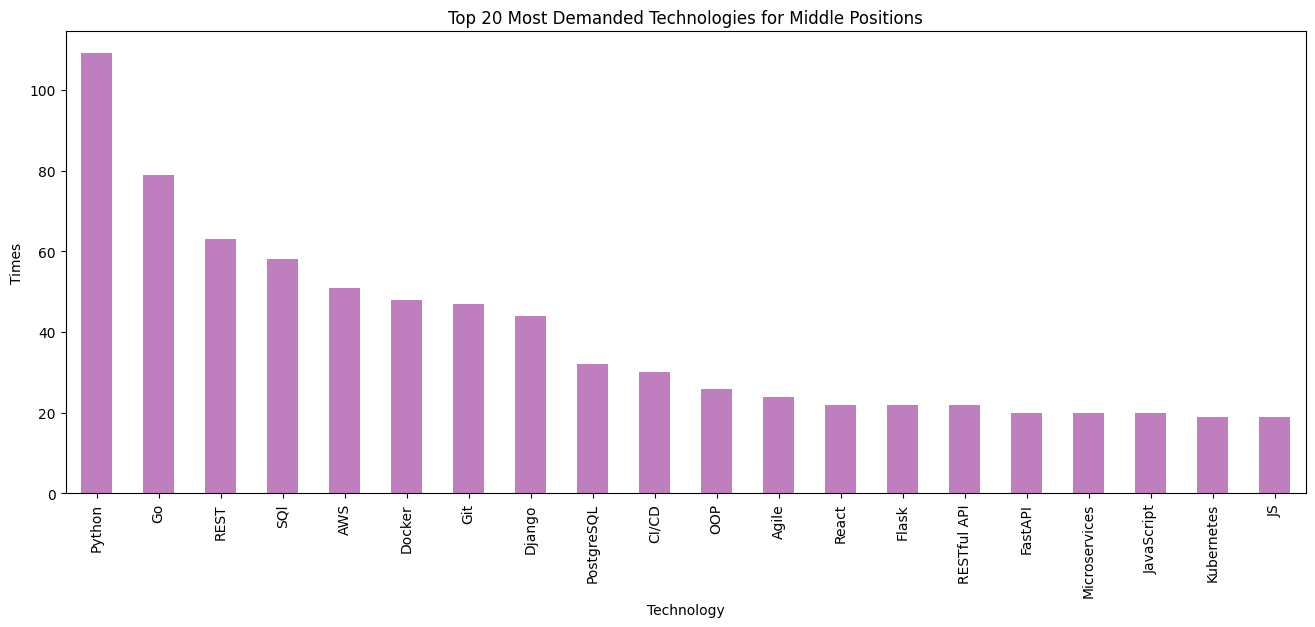

In [43]:
get_top_technologies_by_experience_range(vacancies, "Top 20 Most Demanded Technologies for Middle Positions", 2, 3)

In [44]:
# Analysis of Top 20 Most Demanded Technologies for Senior Positions

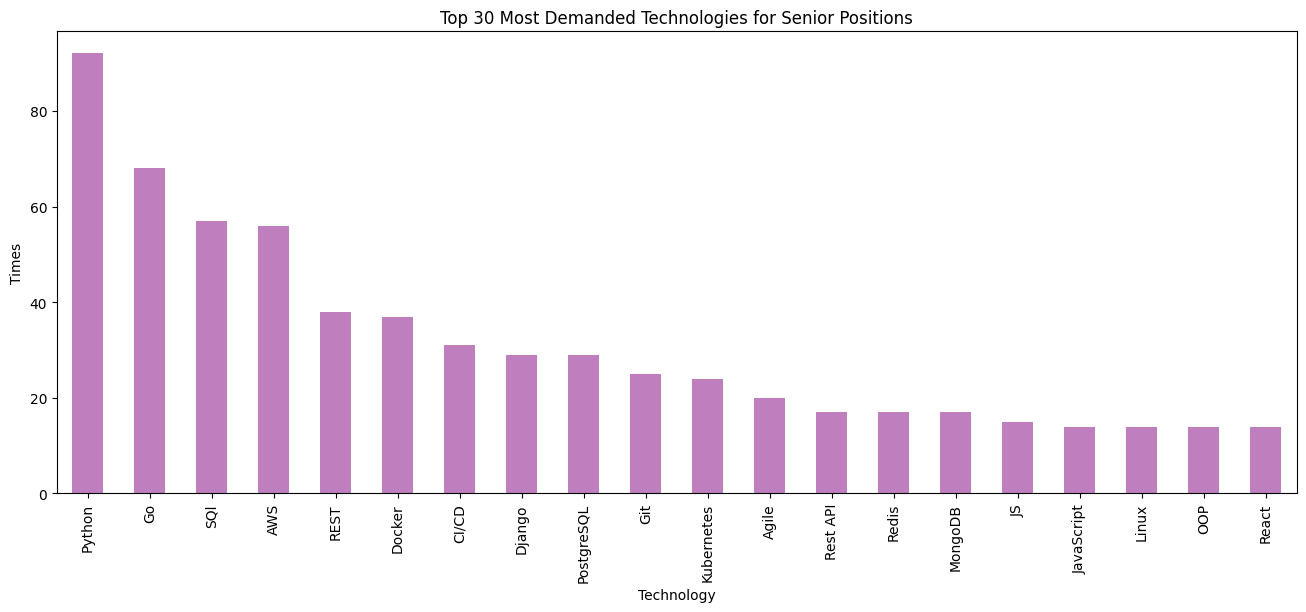

In [45]:
get_top_technologies_by_experience_range(vacancies, "Top 30 Most Demanded Technologies for Senior Positions", 5, 5)

In [46]:
# Analysis of Correlations between Views Counts, Applicant Count, Experience, and Average Salary

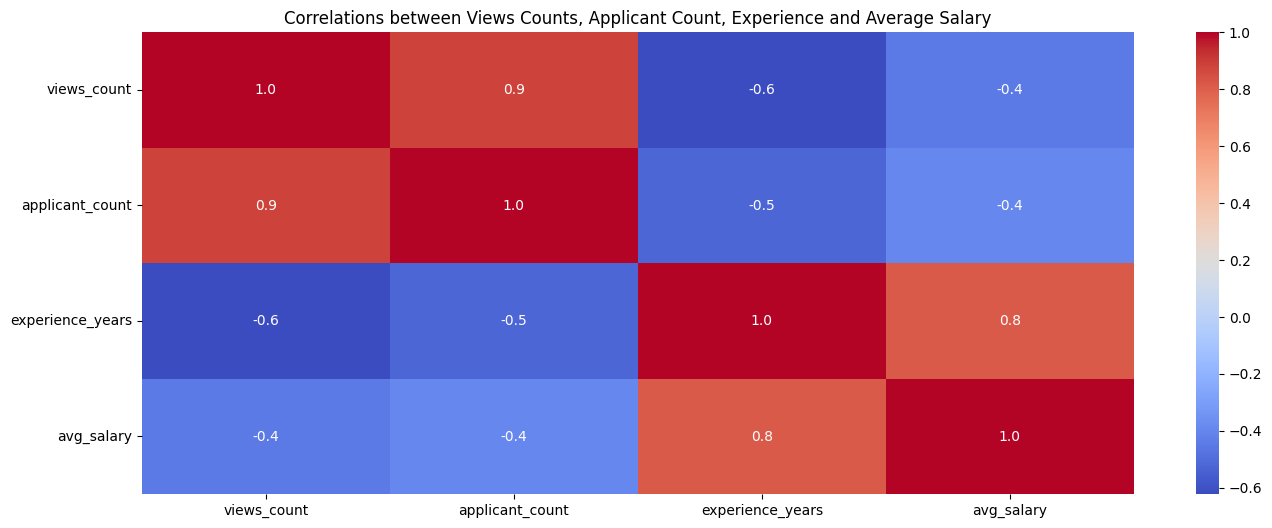

In [47]:
corr = vacancies[["views_count", "applicant_count", "experience_years", "avg_salary"]].corr()

plt.figure(figsize=(16, 6))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Correlations between Views Counts, Applicant Count, Experience and Average Salary")
plt.show()

In [48]:
# Analysis of the demand for the level of the English language

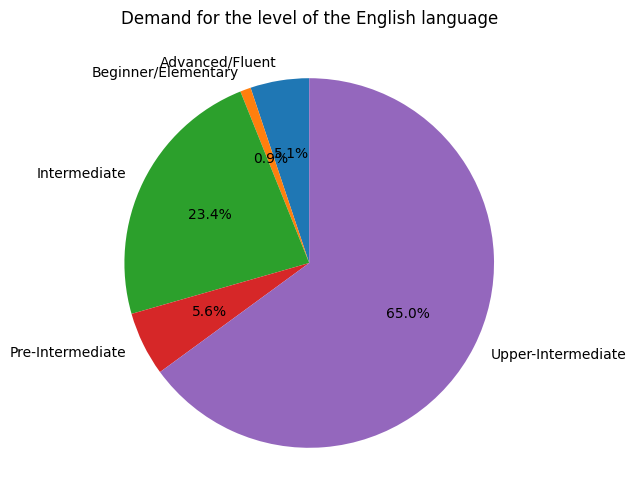

In [49]:
excluded_value = "Не вказано"
english_level = vacancies[vacancies["english_level"] != excluded_value].groupby("english_level")["title"].count()

plt.figure(figsize=(12, 6))
plt.pie(english_level.values, labels=english_level.index, autopct="%1.1f%%", startangle=90)
plt.title("Demand for the level of the English language")
plt.show()

In [50]:
# Analysis of the demand for the level of experience

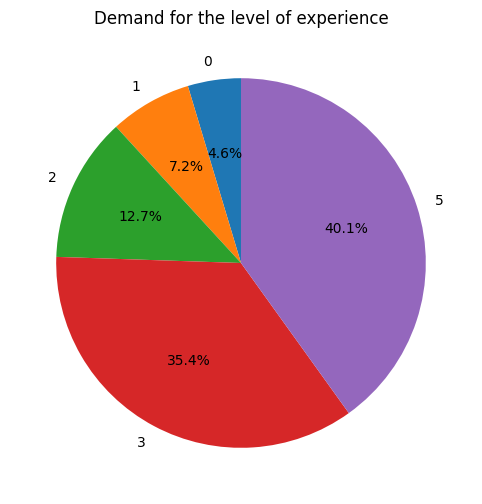

In [51]:
experience_years = vacancies.groupby("experience_years")["title"].count()

plt.figure(figsize=(12, 6))
plt.pie(experience_years.values, labels=experience_years.index, autopct="%1.1f%%", startangle=90)
plt.title("Demand for the level of experience")
plt.show()

In [52]:
# Dependence of the number of publications on the day of the week

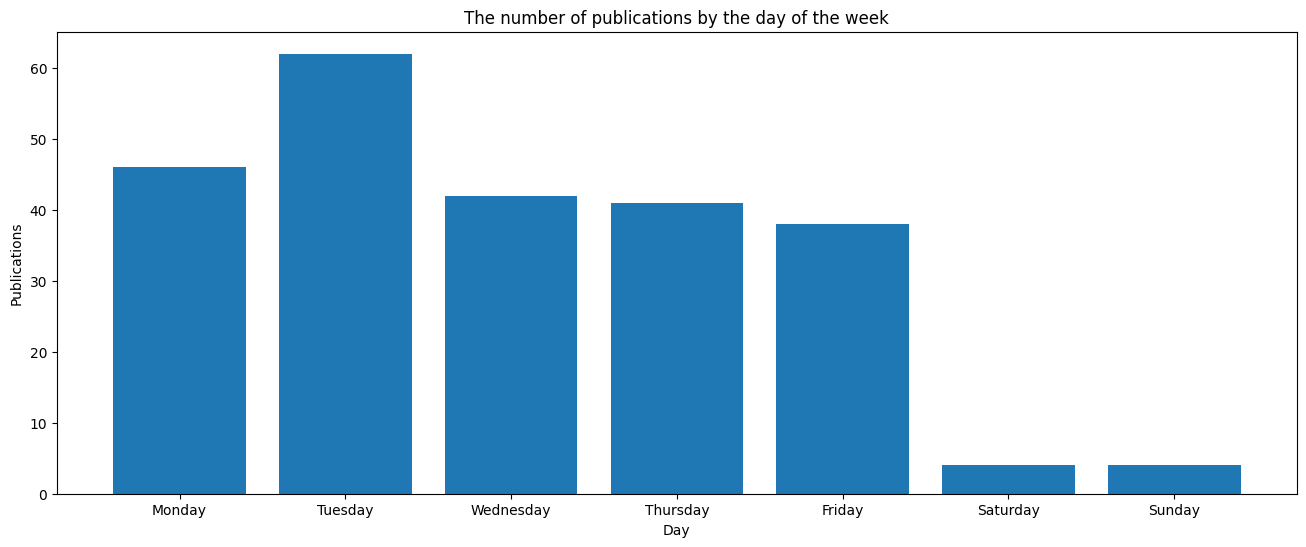

In [53]:
day_map = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
vacancies["publication_day"] = vacancies["publication_date"].dt.day_name()

publication_count_by_the_day = vacancies.groupby("publication_day")["title"].count().reindex(day_map)

plt.figure(figsize=(16, 6))
plt.bar(publication_count_by_the_day.index, publication_count_by_the_day.values)
plt.title("The number of publications by the day of the week")
plt.xlabel("Day")
plt.ylabel("Publications")
plt.show()